In [1]:
import matplotlib.pyplot as plt
import sklearn.datasets as skdata
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve

%matplotlib inline

In [2]:
numeros = skdata.load_digits()
target = numeros['target']
target[target != 1] = 0
imagenes = numeros['images']
n_imagenes = len(target)
data = imagenes.reshape((n_imagenes, -1))
scaler = StandardScaler()
x_train, x_test, y_train, y_test = train_test_split(data, target, train_size=0.5)
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

############## Calcula PCA para todo el conjunto de datos de entrenamiento
cov = np.cov(x_train.T)
valores, vectores = np.linalg.eig(cov)
valores = np.real(valores)
vectores = np.real(vectores)
ii = np.argsort(-valores)
valores = valores[ii]
vectores = vectores[:,ii]

X_train = x_train@vectores.T
X_test = x_test@vectores.T

In [3]:
clf = LinearDiscriminantAnalysis()

ni = 3 
nf = 41

F1_one_test = np.zeros(nf-ni)
F1_one_train = np.zeros(nf-ni)
F1_no_one_test = np.zeros(nf-ni)
F1_no_one_train = np.zeros(nf-ni)

ii_max = 0
pr_max = 0

k=0
for i in range(ni,nf):
    clf.fit(X_train[:,:i+1], y_train)
    y_pred = clf.predict(X_test[:,:i+1])
    F1_one_test[k] = f1_score(y_test, y_pred, pos_label=1)
    F1_no_one_test[k] = f1_score(y_test, y_pred, pos_label=0)
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred)    
    y_pred = clf.predict(X_train[:,:i+1])
    F1_one_train[k] = f1_score(y_train, y_pred, pos_label=1)
    F1_no_one_train[k] = f1_score(y_train, y_pred, pos_label=0)
    k = k+1

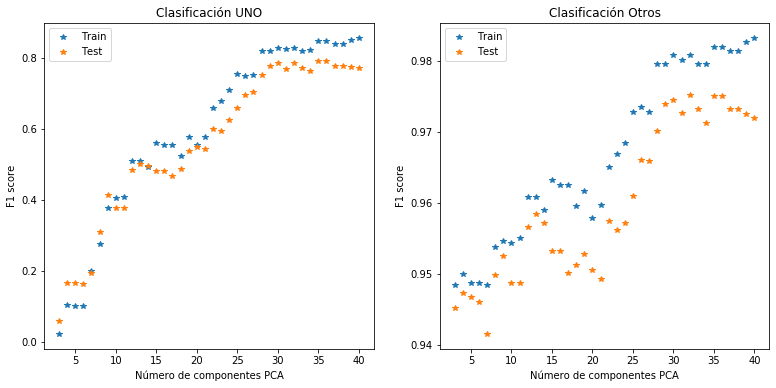

In [4]:
fig = plt.figure(figsize=(13,6))

plt.subplot(1,2,1)
plt.plot(range(ni,nf),F1_one_train,"*",label="Train")
plt.plot(range(ni,nf),F1_one_test,"*",label="Test")
plt.legend()
plt.title("Clasificación UNO")
plt.xlabel("Número de componentes PCA")
plt.ylabel("F1 score")

plt.subplot(1,2,2)
plt.plot(range(ni,nf),F1_no_one_train,"*",label="Train")
plt.plot(range(ni,nf),F1_no_one_test,"*",label="Test")
plt.legend()
plt.title("Clasificación Otros")
plt.xlabel("Número de componentes PCA")
plt.ylabel("F1 score")
plt.savefig("F1_score_LinearDiscriminantAnalysis.png")
plt.show()